# A hands-on tutorial for data science learners: COVID-19 dataset -- Part 3: How to visualize time series data in python?

The main goal of this article, which is a part of a more comprehensive set of tutorials, is to provide a hands-on tutorial for data science learners. Although you may find some useful statistical information about the COVID-19, please note that studying the COVID-19 is not the primary objective here. Hence, you may discern that a large portion of this set of tutorials is devoted to teaching how to use Python and useful packages like _pandas_, _matplotlib_, _seaborn_, etc., in order to accomplish several important tasks in the context of data science. For example, these tutorials will hopefully help you with exploratory data analysis (EDA), data cleansing, statistical analysis, and data visualization of a generic dataset. Yet, some interesting findings will be revealed thanks to the comprehensive dataset provided by _Our World in Data_.


## What you learnt from the past:

- Reading a csv file from your computer or a host on the web, and storing it using a pandas dataframe.
- To examine the dataset using the pandas methods such as `head`, `tail`, `info`, and `describe`.
- Selecting columns of dataframe based on their type using the method `select_dtypes`.
- Selecting numeric and non-numeric variables of a dataframe.
- Checking for the duplicate rows in a dataframe using the method `duplicated`.
- Checking for the missing values in a dataframe using the method `isnull`.
- Methods of `any` and `sum`.
- Extracing a subset of dataset based on a given condition.
- Transposing index and columns of a dataframe using the method `transpose`.


## What you will hopefully learn here:
1. pandas:
- The datetime data types.
- How to convert the data type of a variable of dataframe from object to datetime using the function of `to_datetime`.

2. matplotlib:
- Using the _matplotlib_ library to visualize a time series data.
- Creating different types of plots using the functions `bar` and `plot`.
- Using `subplots` for creating an array of figures.
- Adjust the spacing between subplots using `subplots_adjust`.
- Plotting multiple graphs on the same axes.
- Setting labels and titles of plots.
- Adjusting the size of figures.
- Adding legend to plots.



## COVID-19 Dataset from "Our World in Data"

The COVID-19 dataset that is analyzed in this study, is a collection of the COVID-19 data maintained by "Our World in Data". It is updated daily and includes data on confirmed cases, deaths, hospitalizations, testing, and vaccinations as well as other variables of potential interest [[source]](https://github.com/owid/covid-19-data/tree/master/public/data). 
A full codebook containing a description and source for each variable in the dataset is accessible from [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

# Loading the libraries

Let's first load the required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pprint

# Loading the dataset

Now, let's read tha dataset from the csv file we have stored locally, as seen in the previous tutorials.

In [2]:
fname = 'owid-covid-data.csv'
df = pd.read_csv(fname)

## ***Reading the dataset into a pandas dataframe directly from the URL***

Alternatively, you can read the most-updated dataset into a pandas dataframe directly from its remote repository, as shown below:

In [3]:
import io
csv_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
req = requests.get(csv_url)
s=requests.get(csv_url).content
df_from_url=pd.read_csv(io.StringIO(s.decode('utf-8')))

# Converting the dtype of `date` from `object` to `datetime64`

One can see that the variable `date` in our dataframe is currently of the dtype of `object`: 

In [4]:
df.date.dtypes

dtype('O')

Right now, `date` is just an object... think of it as a mere string. In order to render the variable `date` the _notion of time_, we need to convert its data type (dtype) from `object` to a more proper one. 
Pandas contains extensive capabilities and features for working with time series data for all domains [[more details]](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html), one of which is  the _NumPy `datetime64`_.
The data type is called “datetime64”, just because “datetime” is already taken by the datetime library included in Python [[more details]](https://numpy.org/doc/stable/reference/arrays.datetime.html).

In order to convert the variable `date` to a datetime, we can use the pandas' function `to_datetime` as demonstrated in the following:

In [5]:
#for our local dataset
df.date = pd.to_datetime(df.date)

#for the most up-to-date dataset directly fetched from the remote repository
df_from_url.date = pd.to_datetime(df_from_url.date)

It is also worth mentioning that `datetime64` is a general dtype, while `<M8[ns]` and `>M8[ns]` are specific dtypes that `datetime64` can map to. We can now see that the dtype of `date` is either `<M8[ns]` or `>M8[ns]` depending on the endianness of the machine.

In [6]:
df.date.dtype

dtype('<M8[ns]')

# Visualization of the time series data using matplotlib

Let's pick a location, say US, to see how its COVID-19 stats look like over time. We can create a separate dataframe solely for this specific location:

In [7]:
df_US = df_from_url[df_from_url['location']=='United States']

The following piece of code, creates a 2x2 array of plots. In particular, pay attention to:
- the adjustable parameters of `subplots`,
- how to address axes of each subplot using two indices,
- how to use `bar` to create a bar plot,
- how to set the the label and title of each subplot,
- how to adjust the spacing between subplots using `subplots_adjust`,

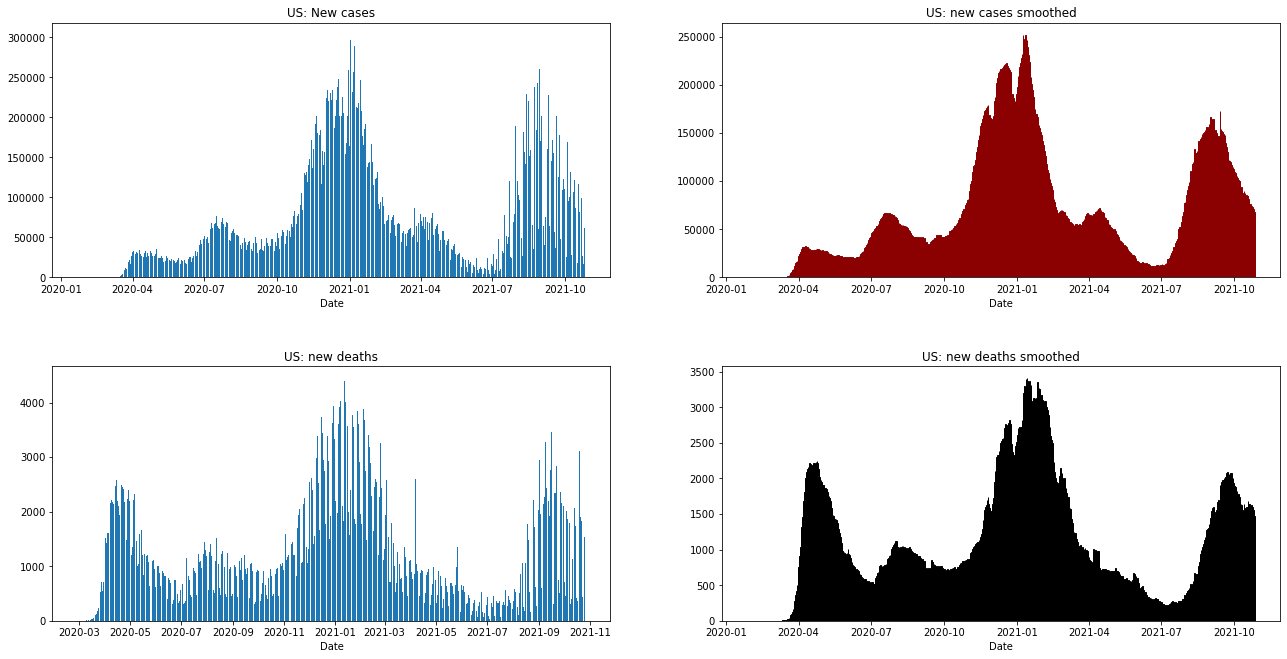

In [8]:
fig, ax = plt.subplots(2,2,figsize=(22,11))

ax[0,0].bar(df_US.date, df_US['new_cases']);
ax[0,1].bar(df_US.date, df_US["new_cases_smoothed"], edgecolor='darkred');
ax[1,0].bar(df_US.date, df_US["new_deaths"]);
ax[1,1].bar(df_US.date, df_US["new_deaths_smoothed"], edgecolor='black');

ax[0,0].set(xlabel= 'Date', title='US: New cases');
ax[0,1].set(xlabel= 'Date', title='US: new cases smoothed');
ax[1,0].set(xlabel= 'Date', title='US: new deaths');
ax[1,1].set(xlabel= 'Date', title='US: new deaths smoothed');

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)

These plots show the stats of new cases and deaths, and their smoothed counterparts over time.
There is clearly a strong correlation between the `new_cases` and `new_deaths` variables. 
There is also a delay/shift between the peaks and valleys of these two variables, which can be more clearly observed if we plot both graphs on the same axes. 

The following piece of code plots several different graphs on the same axes. You can see that we use the `plot` function here, instead of `bar` (feel free to give `bar` also a try to see how it looks like). The graphs include the data for `new_cases_smoothed`, `new_deaths_smoothed`, `new_tests_smoothed`, `new_vaccinations_smoothed`, and `people_fully_vaccinated`.
In order for all the data with distinct orders of magnitude to be clearly seen on the plot, a log-scale is used for the y-axis, here.
In particular, pay attention to:
- how to set the log-scale for an axis, and
- how to adjust the font size of label, legend, as well as the axes' ticks.

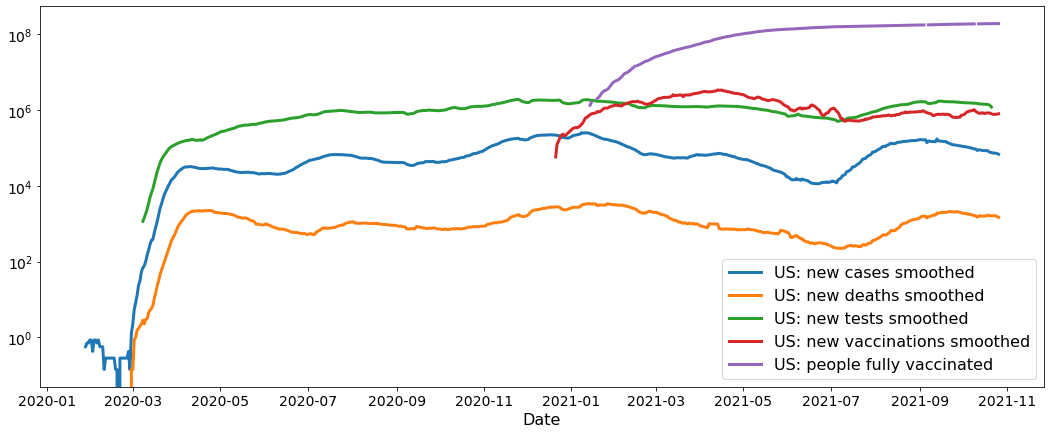

In [9]:
fig, ax = plt.subplots(figsize=(18,7))
ax.plot(df_US.date, df_US["new_cases_smoothed"], label='US: new cases smoothed', linewidth=3);
ax.plot(df_US.date, df_US["new_deaths_smoothed"], label='US: new deaths smoothed', linewidth=3);
ax.plot(df_US.date, df_US["new_tests_smoothed"], label='US: new tests smoothed', linewidth=3);
ax.plot(df_US.date, df_US["new_vaccinations_smoothed"], label='US: new vaccinations smoothed', linewidth=3);
ax.plot(df_US.date, df_US["people_fully_vaccinated"], label='US: people fully vaccinated', linewidth=3);

ax.set_yscale('log')
ax.set_xlabel('Date', fontsize=16)
ax.legend(prop={"size":16});
ax.tick_params(axis='both', which='major', labelsize=14)

This single plot contains so much data, since it simultaneously depicts the stats of several time series over time. 
Now, the delay between peaks and valleys of _new cases_ and _new deaths_ is more discernible: _new deaths_ follows _new cases_ with a lag of the order of a few weeks.

In case, we want to plot the data only for dates that come after a given date, say Jan. 1, 2021, we can use a piece of code like this:

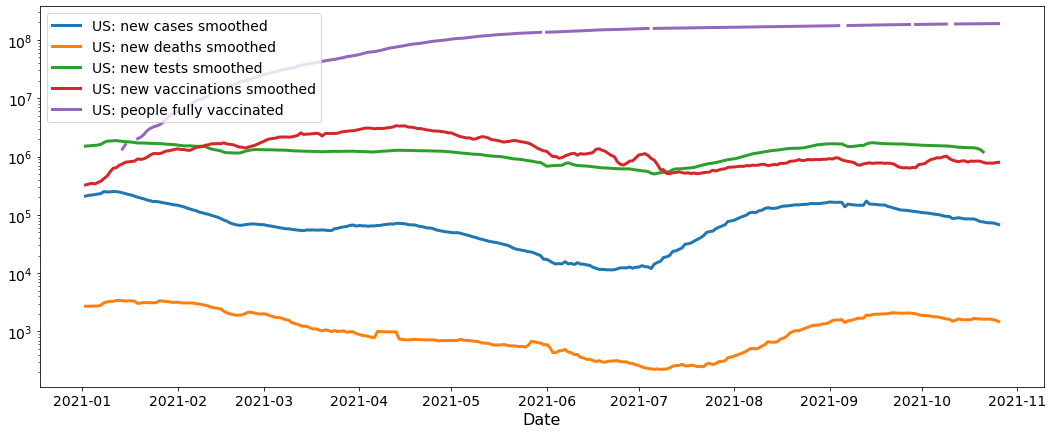

In [10]:
this_min_date = '2021-01-01'

fig, ax = plt.subplots(figsize=(18,7))
ax.plot(df_US.date[df_US.date>this_min_date], df_US["new_cases_smoothed"][df_US.date>this_min_date], label='US: new cases smoothed', linewidth=3);
ax.plot(df_US.date[df_US.date>this_min_date], df_US["new_deaths_smoothed"][df_US.date>this_min_date], label='US: new deaths smoothed', linewidth=3);
ax.plot(df_US.date[df_US.date>this_min_date], df_US["new_tests_smoothed"][df_US.date>this_min_date], label='US: new tests smoothed', linewidth=3);
ax.plot(df_US.date[df_US.date>this_min_date], df_US["new_vaccinations_smoothed"][df_US.date>this_min_date], label='US: new vaccinations smoothed', linewidth=3);
ax.plot(df_US.date[df_US.date>this_min_date], df_US["people_fully_vaccinated"][df_US.date>this_min_date], label='US: people fully vaccinated', linewidth=3);

ax.set_yscale('log')
ax.set_xlabel('Date', fontsize=16)
ax.legend(prop={"size":14}, loc='upper left');
ax.tick_params(axis='both', which='major', labelsize=14)

# Final remarks

Hopefully, this short tutorial was able to help you use Python in future to get more insight into your own dataset. The process of development of this set of tutorials is ongoing at the time of writing. To learn more, you can check out to see if the next parts are available online. You can also check out the forums, in case you want to check out the discussions that might be relevant to this topic. 